In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from WelfareMeasures import *
from functions_njit import tax_rate_fct
from bernoulli_distribution import Bernoulli
from help_functions_non_njit import *
from graph_format import *
# load local model file and initialize model class
from model import ModelClass
from scipy.optimize import minimize
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df = df.astype(type_dict)
df[['LS', 'CE']] = df[['LS', 'CE']]*100
df[['SPA', 'RPA']] = df[['SPA', 'RPA']]+30

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\peter\AppData\Local\Temp\ipykernel_24108\1747222296.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Brighter green-white-red transition
green_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#BF616A","#EBCB8B", "#A3BE8C"]
)


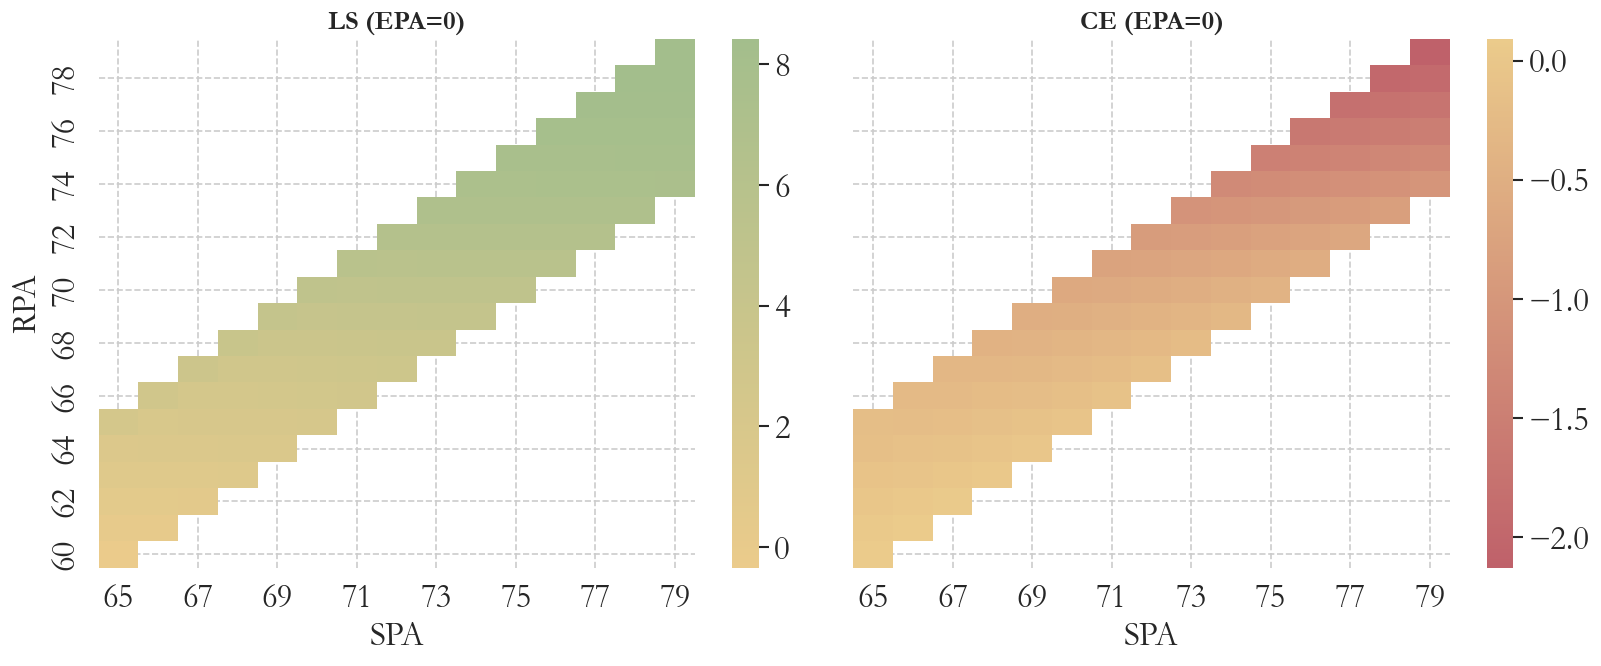

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Brighter green-white-red transition
yellow_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#EBCB8B", "#A3BE8C"]
)
green_yellow = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#BF616A","#EBCB8B"]
)

# Fixed EPA value
fixed_epa = 0
subset = df[df['EPA'] == fixed_epa]

# Pivot data
pivot_ls = subset.pivot(index='RPA', columns='SPA', values='LS')
pivot_ce = subset.pivot(index='RPA', columns='SPA', values='CE')

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.heatmap(pivot_ls, cmap=yellow_red, annot=False, ax=axes[0], cbar=True)
axes[0].invert_yaxis()
axes[0].set_title(f"LS (EPA={fixed_epa})")
axes[0].set_xlabel("SPA")
axes[0].set_ylabel("RPA")

sns.heatmap(pivot_ce, cmap=green_yellow, annot=False, ax=axes[1], cbar=True)
axes[1].invert_yaxis()
axes[1].set_title(f"CE (EPA={fixed_epa})")
axes[1].set_xlabel("SPA")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


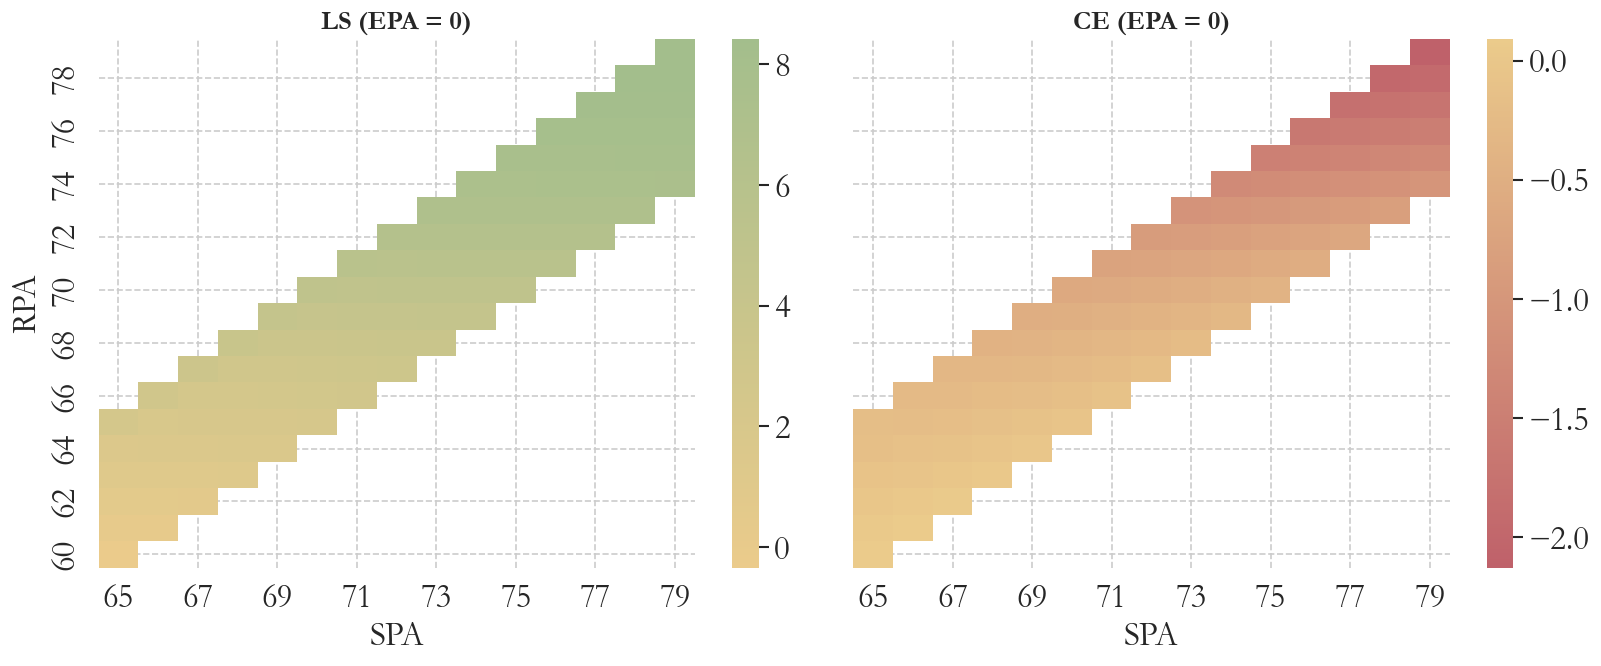

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# --- Custom vivid colormaps ---
yellow_red = mcolors.LinearSegmentedColormap.from_list("YellowToGreen", ["#EBCB8B", "#A3BE8C"])
green_yellow = mcolors.LinearSegmentedColormap.from_list("RedToYellow", ["#BF616A", "#EBCB8B"])

# --- Subset for EPA = 0 ---
fixed_epa = 0
subset = df[df['EPA'] == fixed_epa]

# Pivot values
pivot_ls = subset.pivot(index='RPA', columns='SPA', values='LS')
pivot_ce = subset.pivot(index='RPA', columns='SPA', values='CE')

# --- Create figure and axes ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# LS Heatmap
sns.heatmap(pivot_ls, cmap=yellow_red, ax=axes[0], annot=False, cbar=True)
axes[0].invert_yaxis()
axes[0].set_title(f"LS (EPA = {fixed_epa})", fontweight="bold")
axes[0].set_xlabel("SPA")
axes[0].set_ylabel("RPA")

# CE Heatmap
sns.heatmap(pivot_ce, cmap=green_yellow, ax=axes[1], annot=False, cbar=True)
axes[1].invert_yaxis()
axes[1].set_title(f"CE (EPA = {fixed_epa})", fontweight="bold")
axes[1].set_xlabel("SPA")
axes[1].set_ylabel("")

# Layout
plt.tight_layout()
plt.show()


In [6]:
for i in df.RPA.unique():
    df_RPA = df[df['RPA'] == i]


C:\Users\peter\AppData\Local\Temp\ipykernel_24108\2865713012.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')


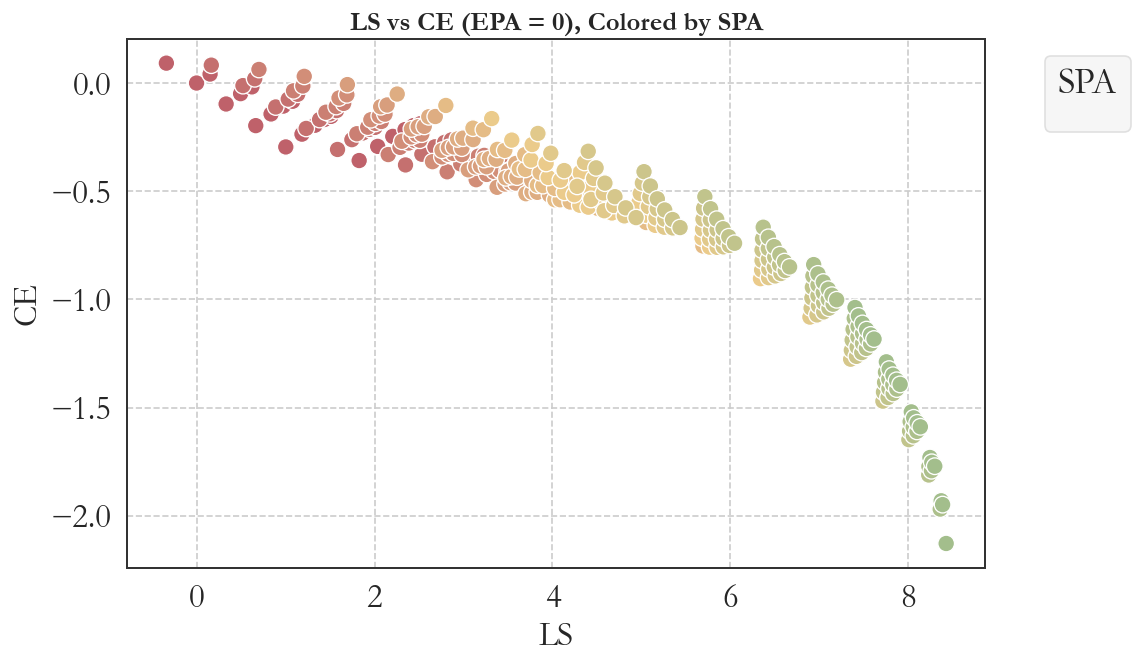

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
unique_rpa = sorted(df['RPA'].unique())



plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='LS', y='CE', hue='SPA',
                palette=green_red, s=100, legend=False)  # Avoid duplicate legends

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_24108\4035612489.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')


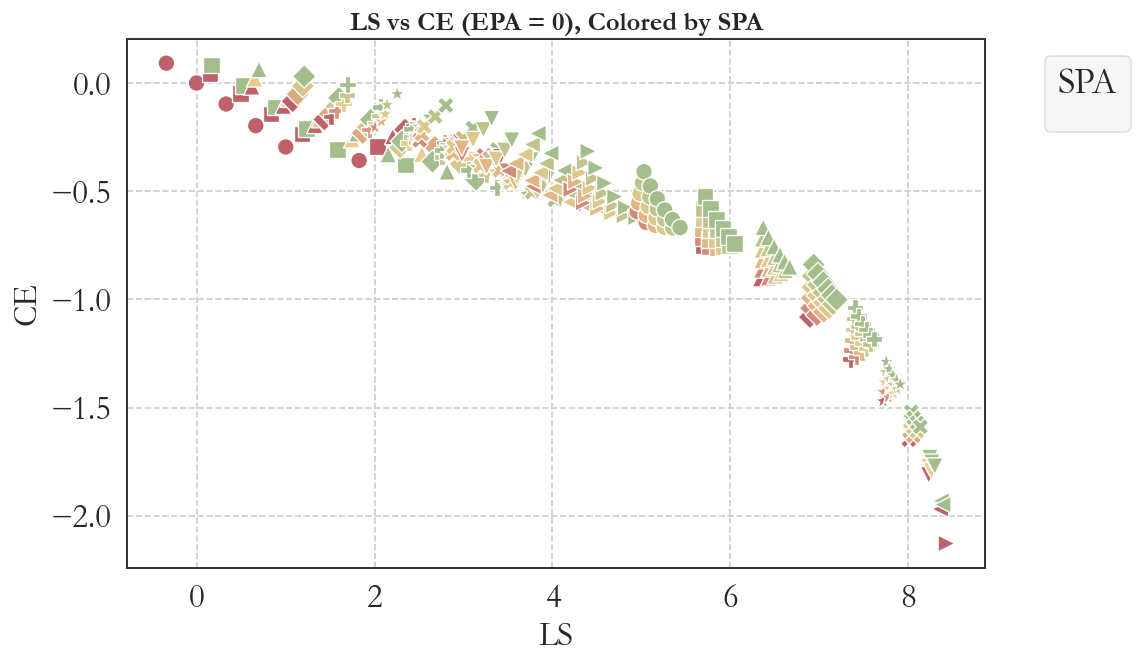

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
unique_rpa = sorted(df['RPA'].unique())

markers = ['o', 's', '^', 'D', 'P', '*', 'X', 'v', '<', '>']  # Extend if needed


plt.figure(figsize=(10, 6))

for i, rpa in enumerate(unique_rpa):
    df_rpa = df[df['RPA'] == rpa]
    sns.scatterplot(data=df_rpa, x='LS', y='CE', hue='SPA',
                    palette=green_red, s=100, marker=markers[i % len(markers)],
                    legend=False)  # Avoid duplicate legends

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
df_epa = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df_epa.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
df_epa['EPA'] = df_epa['EPA']+df_epa['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_epa = df_epa.astype(type_dict)
df_epa[['LS', 'CE']] = df_epa[['LS', 'CE']]*100

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\peter\AppData\Local\Temp\ipykernel_24108\2058038709.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_epa = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)


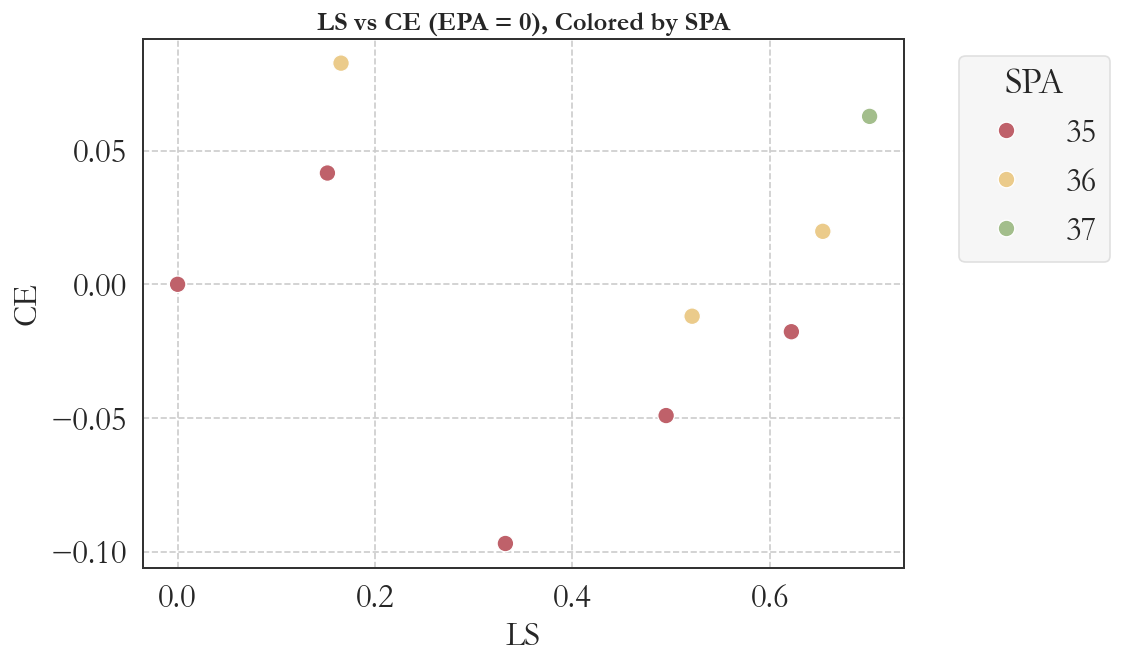

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

t = 31
temp_sub = df_epa[((df_epa['EPA']==t) | (df_epa['EPA']==t+1))]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_sub, x='LS', y='CE', hue='SPA', palette=green_red, s=100)

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

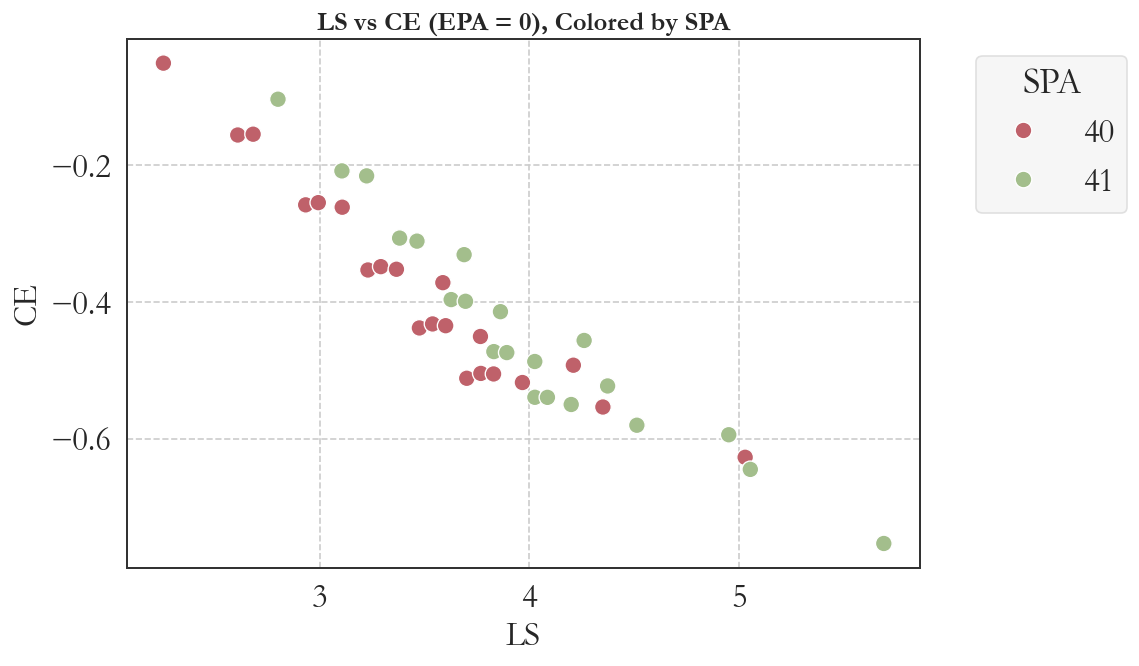

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

t = 40

temp_sub = df_epa[((df_epa['SPA']==t) | (df_epa['SPA']==t+1))]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_sub, x='LS', y='CE', hue='SPA', palette=green_red, s=100)

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

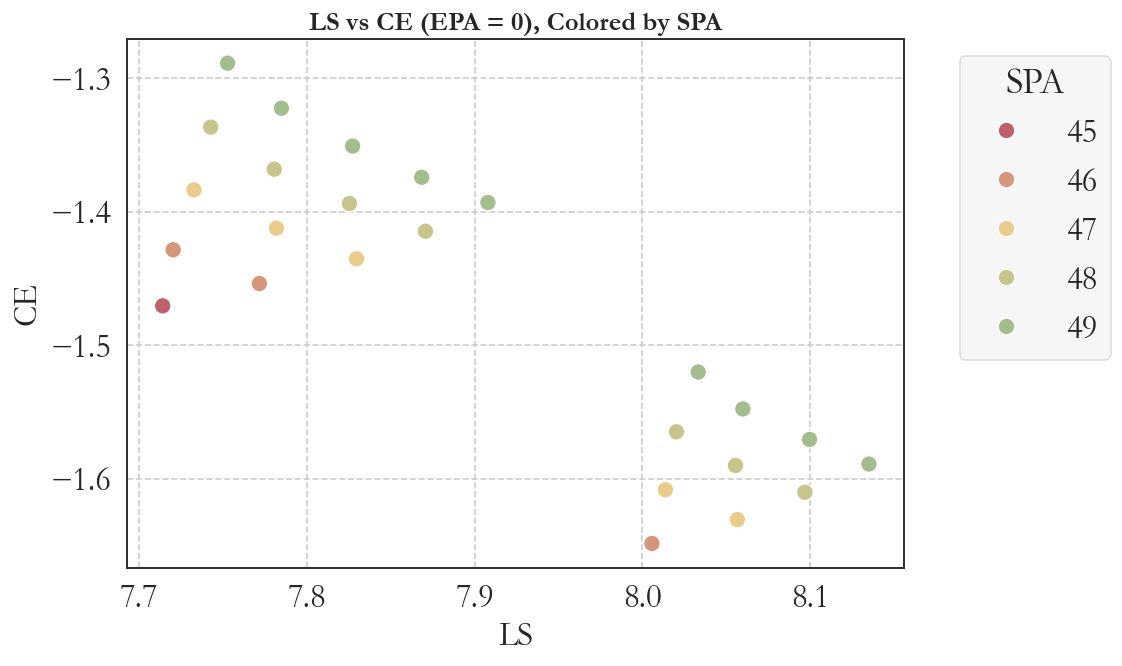

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

t= 45
temp_sub = df_epa[((df_epa['RPA']==t) | (df_epa['RPA']==t+1))]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_sub, x='LS', y='CE', hue='SPA', palette=green_red, s=100)

plt.title('LS vs CE (EPA = 0), Colored by SPA')
plt.xlabel('LS')
plt.ylabel('CE')
plt.legend(title='SPA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Relative change in LS

In [13]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)
%time model.simulate()

CPU times: total: 29min 34s
Wall time: 4min 21s
CPU times: total: 54.8 s
Wall time: 26.8 s


In [14]:
pi_cum = np.cumprod(par.pi)
total_margin_og = np.mean(pi_cum[:model.par.last_retirement] * model.sim.h[:, :model.par.last_retirement])

In [15]:
df_ny = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df_ny.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_ny = df_ny.astype(type_dict)
df_ny[['LS', 'CE']] = df_ny[['LS', 'CE']]*100
df_ny[['SPA', 'RPA']] = df_ny[['SPA', 'RPA']]+30
pi_cum = np.cumprod(par.pi)
total_margin_og = np.mean(pi_cum[:model.par.last_retirement] * model.sim.h[:, :model.par.last_retirement])
df_ny['LS_relativ'] =df_ny['LS'] /total_margin_og

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\peter\AppData\Local\Temp\ipykernel_24108\3685751863.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_ny = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)


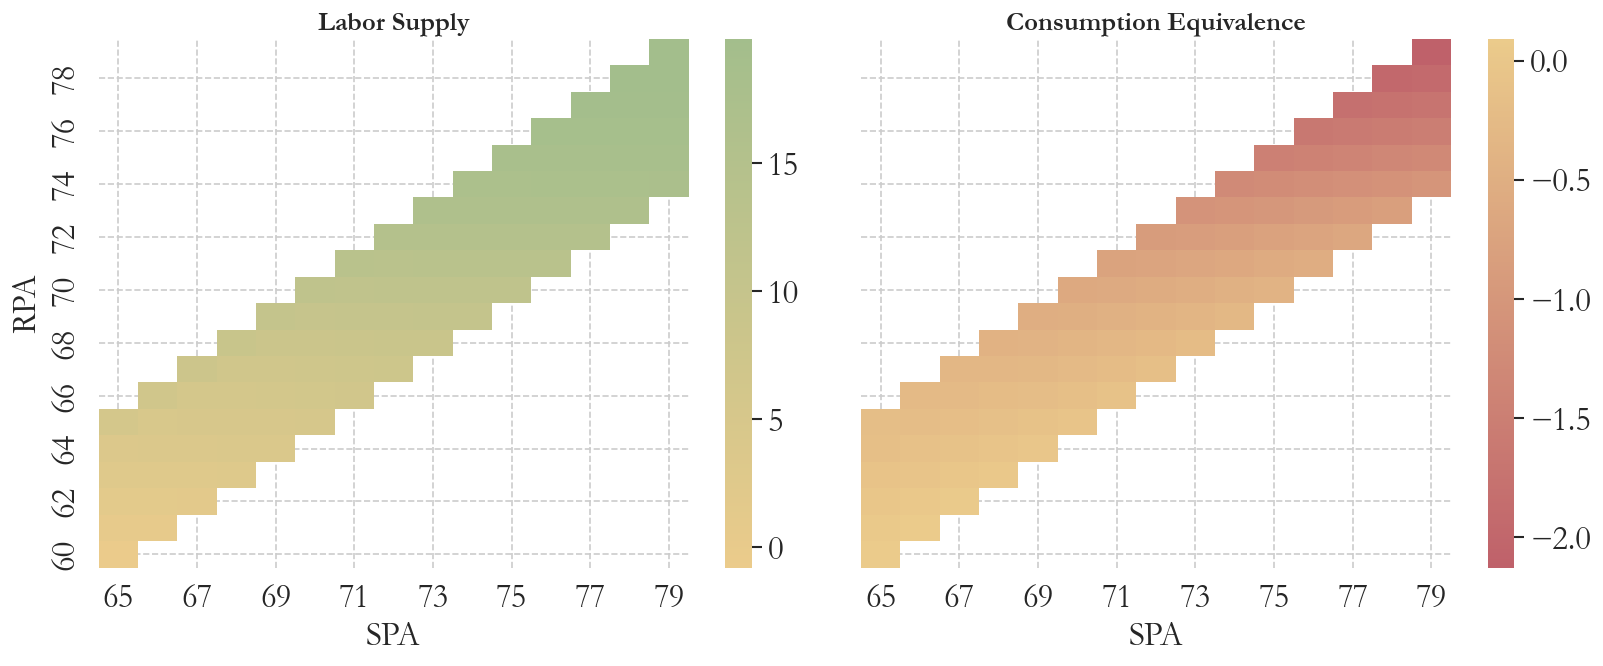

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Brighter green-white-red transition
yellow_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#EBCB8B", "#A3BE8C"]
)
green_yellow = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#BF616A","#EBCB8B"]
)

# Fixed EPA value
fixed_epa = 0
subset = df_ny[df_ny['EPA'] == fixed_epa]

# Pivot data
pivot_ls = subset.pivot(index='RPA', columns='SPA', values='LS_relativ')
pivot_ce = subset.pivot(index='RPA', columns='SPA', values='CE')

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.heatmap(pivot_ls, cmap=yellow_red, annot=False, ax=axes[0], cbar=True)
axes[0].invert_yaxis()
axes[0].set_title(f"Labor Supply")
axes[0].set_xlabel("SPA")
axes[0].set_ylabel("RPA")

sns.heatmap(pivot_ce, cmap=green_yellow, annot=False, ax=axes[1], cbar=True)
axes[1].invert_yaxis()
axes[1].set_title(f"Consumption Equivalence")
axes[1].set_xlabel("SPA")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()
save_figure(fig, "CF_policy_space_heatmap.png")


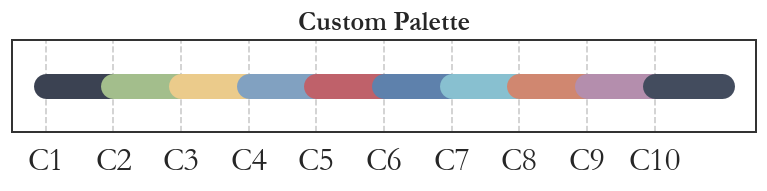

In [ ]:
import matplotlib.pyplot as plt

custom_palette = [
    "#3B4252", "#A3BE8C", "#EBCB8B", "#81A1C1", "#BF616A",
    "#5E81AC", "#88C0D0", "#D08770", "#B48EAD", "#434C5E"
]

# Plot each color as a swatch
plt.figure(figsize=(8, 1))
for i, color in enumerate(custom_palette):
    plt.plot([i, i+1], [0, 0], color=color, linewidth=15)

plt.xticks(range(len(custom_palette)), labels=[f'C{i+1}' for i in range(len(custom_palette))])
plt.yticks([])
plt.title('Custom Palette')
plt.show()


In [17]:
df_temp = df_ny
# df_temp['EPA'] = df_temp['RPA'] + df_temp['EPA']
df_temp = df_temp[df_temp['EPA']>df_temp['RPA']]

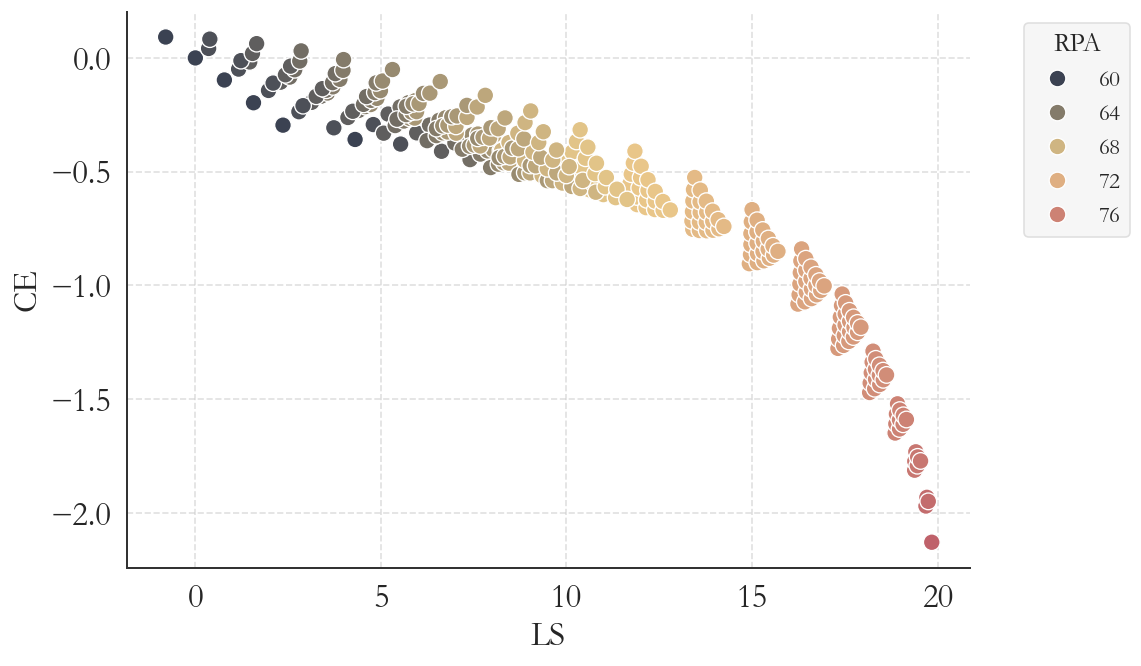

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))



# Brighter green-white-red transition
black_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#3B4252","#EBCB8B", "#BF616A"]
)



# --- Scatter plot ---
sns.scatterplot(
    data=df_ny,
    x='LS_relativ',
    y='CE',
    hue='RPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=ax
)

# --- Formatting consistent with graph_format.py ---
ax.set_xlabel('LS', fontsize=20, fontweight='medium')
ax.set_ylabel('CE', fontsize=20, fontweight='medium')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', labelsize=20)

# --- Remove top/right spines (box edges) ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Legend formatting ---
ax.legend(
    title='RPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

plt.tight_layout()
plt.show()
save_figure(fig, "CF_policy_space_LS_CE_RPA_cluster.png")


In [ ]:
highlight_points

,SPA,RPA,EPA,LS,CE,LS_relativ
12,65,62,1,0.974591,-0.106567,2.295374
47,67,62,5,2.816272,-0.410301,6.632935


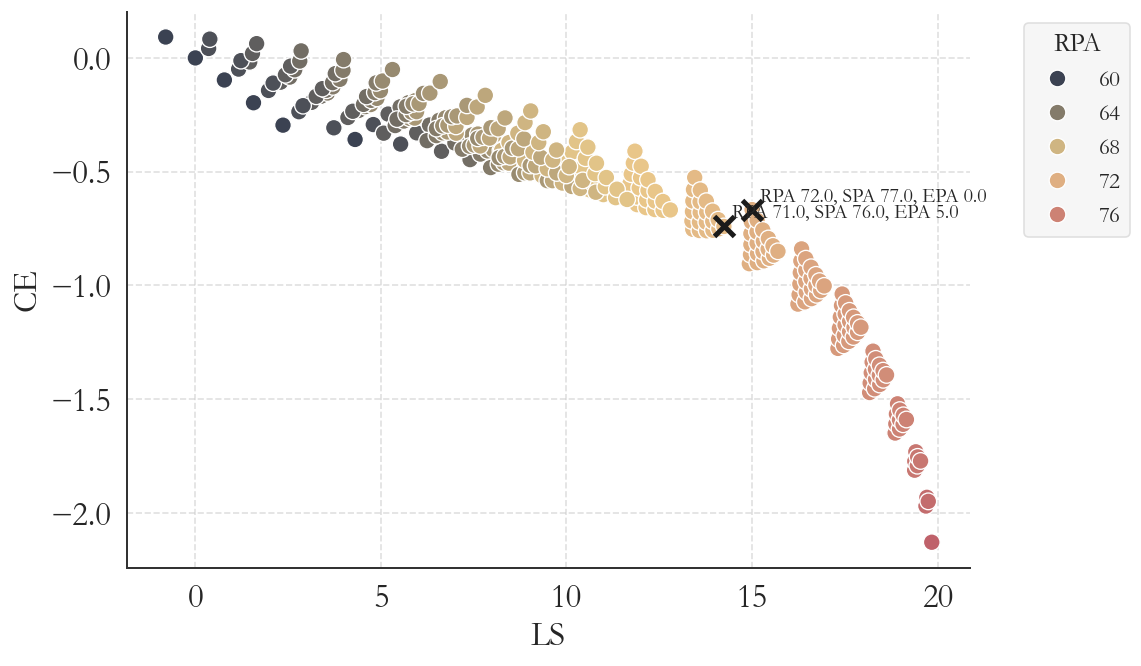

In [19]:
# Define which points to highlight
conditions = [
    (71, 76, 5),  # (RPA, SPA, EPA)
    (72, 77, 0)
]

# Extract matching rows
highlight_points = pd.concat([
    df_ny[(df_ny['RPA'] == rpa) & (df_ny['SPA'] == spa) & (df_ny['EPA'] == epa)]
    for rpa, spa, epa in conditions
])

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

black_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#3B4252", "#EBCB8B", "#BF616A"]
)

sns.scatterplot(
    data=df_ny,
    x='LS_relativ',
    y='CE',
    hue='RPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=ax
)

# Highlight selected points
for _, row in highlight_points.iterrows():
    ax.plot(row['LS_relativ'], row['CE'], 'kx', markersize=12, mew=3)
    ax.annotate(
        f"RPA {row['RPA']}, SPA {row['SPA']}, EPA {row['EPA']}",
        (row['LS_relativ'], row['CE']),
        fontsize=12,
        xytext=(5, 5),
        textcoords='offset points'
    )

# Formatting
ax.set_xlabel('LS', fontsize=20, fontweight='medium')
ax.set_ylabel('CE', fontsize=20, fontweight='medium')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(
    title='RPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

plt.tight_layout()
save_figure(fig, "CF_policy_space_LS_CE_RPA_cluster_marked_values.png")
plt.show()


NameError: name 'offsets' is not defined

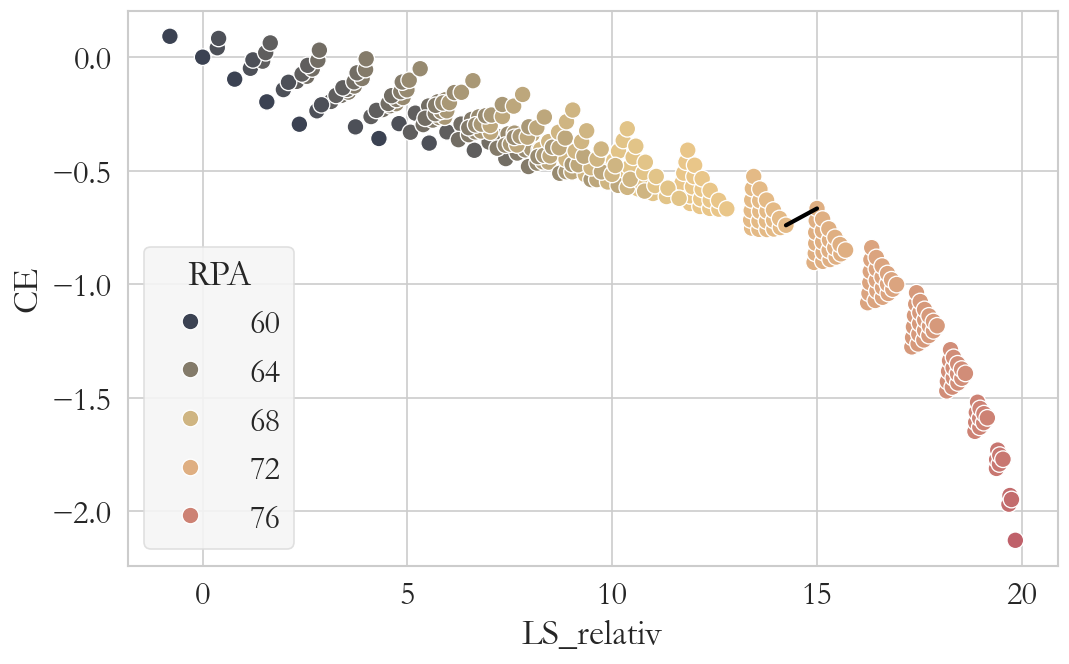

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\peter\AppData\Local\Temp\ipykernel_24108\1296111746.py:13: SyntaxWarning: invalid escape sequence '\s'
  df_ny = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)


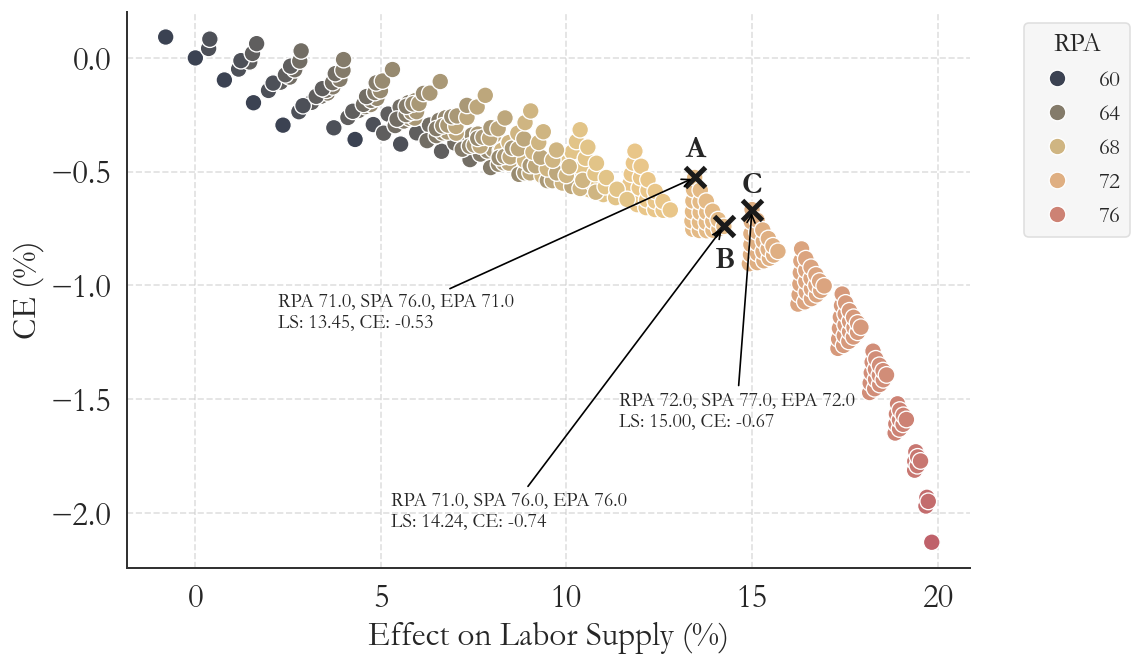

In [54]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

# Define which points to highlight (RPA, SPA, EPA)
conditions = [
    (71, 76, 71),
    (71, 76, 76),
    (72, 77, 72)
]

df_ny = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df_ny.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_ny = df_ny.astype(type_dict)
df_ny[['LS', 'CE']] = df_ny[['LS', 'CE']]*100
df_ny[['SPA', 'RPA']] = df_ny[['SPA', 'RPA']]+30
pi_cum = np.cumprod(par.pi)
total_margin_og = np.mean(pi_cum[:model.par.last_retirement] * model.sim.h[:, :model.par.last_retirement])
df_ny['LS_relativ'] =df_ny['LS'] /total_margin_og
df_ny['EPA'] = df_ny['EPA']+df_ny['RPA']

# Extract matching rows
highlight_points = pd.concat([
    df_ny[(df_ny['RPA'] == rpa) & (df_ny['SPA'] == spa) & (df_ny['EPA'] == epa)]
    for rpa, spa, epa in conditions
]).sort_values(by='LS_relativ')

# Create figure and custom colormap
fig, ax = plt.subplots(figsize=(10, 6))

black_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#3B4252", "#EBCB8B", "#BF616A"]
)

# --- Scatter plot ---
sns.scatterplot(
    data=df_ny,
    x='LS_relativ',
    y='CE',
    hue='RPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=ax
)

# --- Highlight and annotate selected points ---
offsets = [(-250, -90), (-200, -180), (-80, -130)]  # Adjust per label to avoid overlap
labels = ['A', 'B', 'C']

# --- Highlight and annotate selected points ---
offsets = [(-250, -90), (-200, -180), (-80, -130)]  # Annotation arrow offsets
labels = ['A', 'B', 'C']

for idx, ((i, row), offset, label_char) in enumerate(zip(highlight_points.iterrows(), offsets, labels)):
    ax.plot(row['LS_relativ'], row['CE'], 'kx', markersize=12, mew=3)

    # Default label position
    text_x = row['LS_relativ'] + 0.3
    text_y = row['CE'] + 0.05

    # Apply different offset for label B (index 1)
    if label_char == 'A':
        text_x += -0.55   # further right
        text_y += 0.04   # slightly higher

    if label_char == 'B':
        text_x += -0.55   # further right
        text_y += -0.23   # slightly higher

    # Apply different offset for label B (index 1)
    if label_char == 'C':
        text_x += -0.58   # further right
        text_y += 0.025   # slightly higher

    ax.text(
        text_x,
        text_y,
        label_char,
        fontsize=18,
        fontweight='bold'
    )

    label = (
        f"RPA {row['RPA']}, SPA {row['SPA']}, EPA {row['EPA']}\n"
        f"LS: {row['LS_relativ']:.2f}, CE: {row['CE']:.2f}"
    )

    ax.annotate(
        label,
        (row['LS_relativ'], row['CE']),
        fontsize=12,
        xytext=offset,
        textcoords='offset points',
        ha='left',
        arrowprops=dict(arrowstyle='->', color='black', lw=1)
    )



# --- Style plot like graph_format.py ---
ax.set_xlabel('Effect on Labor Supply (%)', fontsize=20, fontweight='medium')
ax.set_ylabel('CE (%)', fontsize=20, fontweight='medium')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Legend ---
ax.legend(
    title='RPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

plt.tight_layout()
save_figure(fig, "CF_policy_space_LS_CE_RPA_cluster_marked_values.png")
plt.show()


C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\342831904.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\342831904.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(


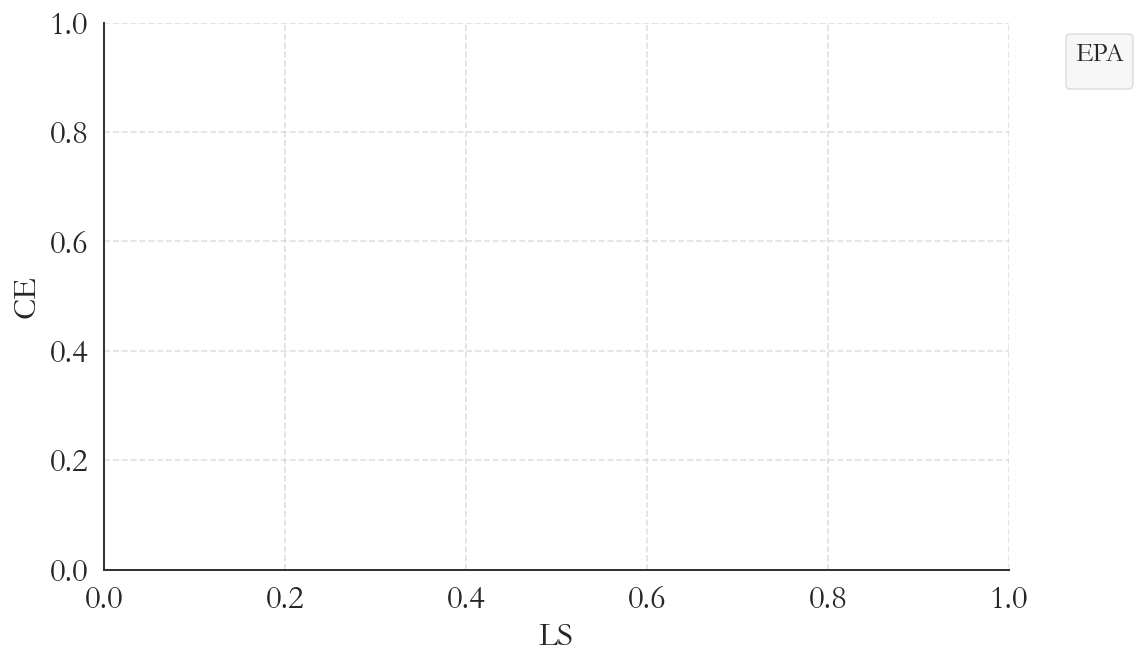

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# --- Scatter plot ---
sns.scatterplot(
    data=df_temp,
    x='LS_relativ',
    y='CE',
    hue='EPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=ax
)

# --- Formatting consistent with graph_format.py ---
ax.set_xlabel('LS', fontsize=20, fontweight='medium')
ax.set_ylabel('CE', fontsize=20, fontweight='medium')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', labelsize=20)

# --- Remove top/right spines (box edges) ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- Legend formatting ---
ax.legend(
    title='EPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

plt.tight_layout()
plt.show()
save_figure(fig, "CF_policy_space_LS_CE_EPA_cluster.png")


C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\3809823103.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\3809823103.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(


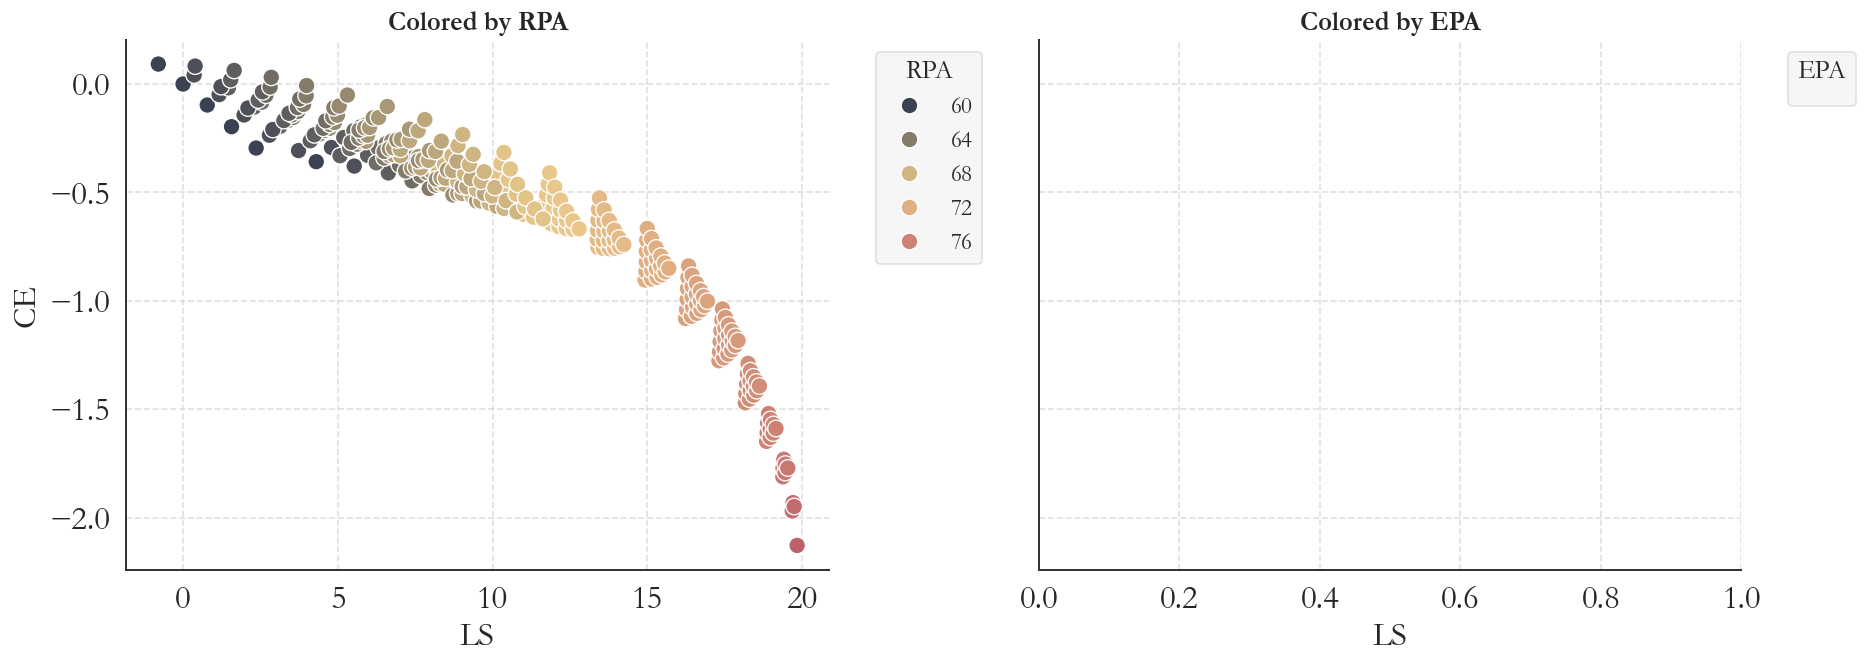

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# --- Custom colormap ---
black_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#3B4252", "#EBCB8B", "#BF616A"]
)

# --- Create subplots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Plot 1: Colored by RPA ---
sns.scatterplot(
    data=df_ny,
    x='LS_relativ',
    y='CE',
    hue='RPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=axes[0]
)
axes[0].set_title("Colored by RPA", fontsize=16, fontweight='bold')
axes[0].set_xlabel('LS', fontsize=20, fontweight='medium')
axes[0].set_ylabel('CE', fontsize=20, fontweight='medium')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].tick_params(axis='both', labelsize=20)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].legend(
    title='RPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

# --- Plot 2: Colored by EPA ---
sns.scatterplot(
    data=df_temp,
    x='LS_relativ',
    y='CE',
    hue='EPA',
    palette=black_red,
    s=100,
    legend=True,
    ax=axes[1]
)
axes[1].set_title("Colored by EPA", fontsize=16, fontweight='bold')
axes[1].set_xlabel('LS', fontsize=20, fontweight='medium')
axes[1].set_ylabel('', fontsize=20, fontweight='medium')  # Hide duplicate ylabel
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].tick_params(axis='both', labelsize=20)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].legend(
    title='EPA',
    title_fontsize=16,
    fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    facecolor='#f5f5f5',
    edgecolor='#dddddd'
)

plt.tight_layout()
plt.show()

# Save as one combined figure
save_figure(fig, "CF_policy_space_LS_CE_RPA_EPA_cluster.png")


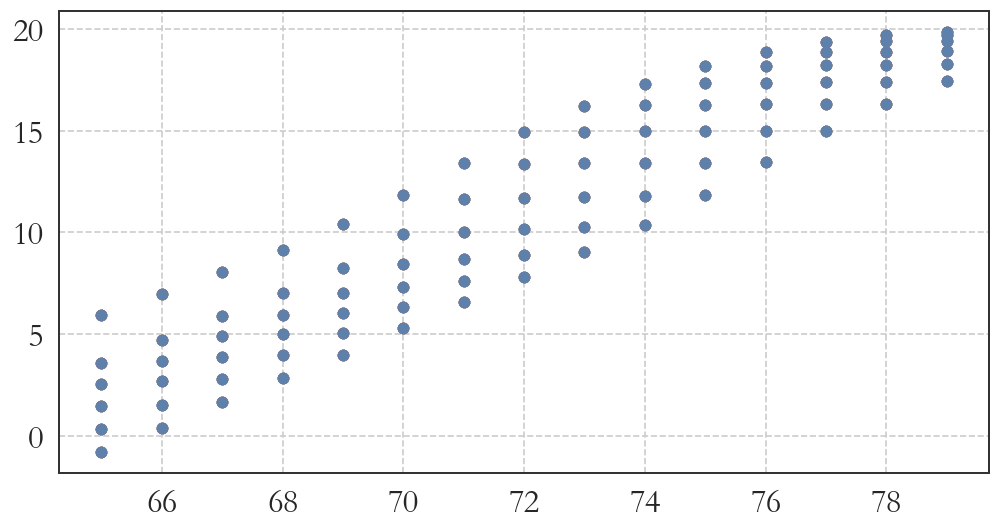

In [ ]:
for i in df.EPA.unique():
    data = df_ny[df_ny['EPA']==0]
    plt.scatter(data['SPA'], data['LS_relativ'])
# plt.scatter(data['SPA'], data['CE'])

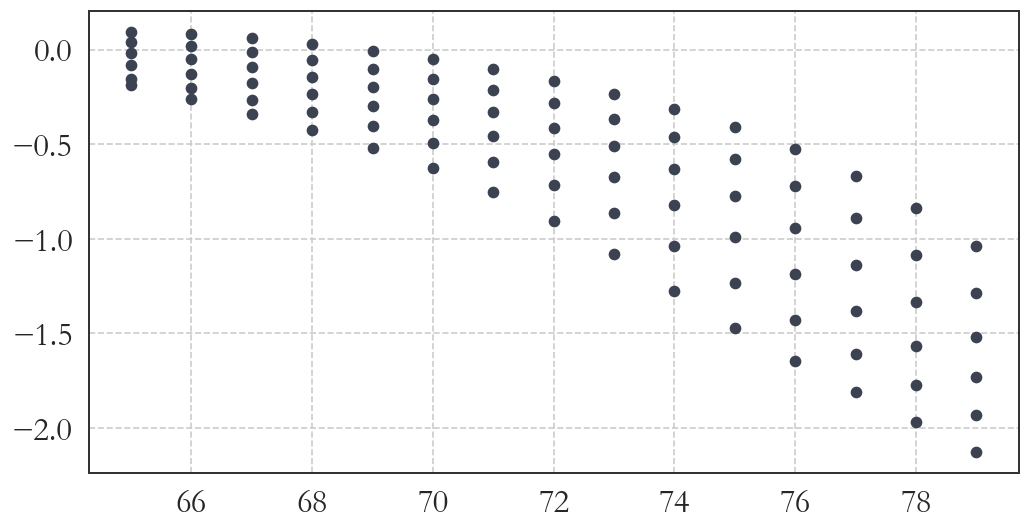

In [ ]:
plt.scatter(data['SPA'], data['CE'])

In [31]:
df_RPA = pd.read_csv('Andet\\andet_data\\increasing_RPA.txt', sep='\s+', header=None)

# Assign column names (optional)
df_RPA.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_RPA = df_RPA.astype(type_dict)
df_RPA[['LS', 'CE']] = df_RPA[['LS', 'CE']]*100
df_RPA[['SPA', 'RPA','EPA']] = df_RPA[['SPA', 'RPA', 'EPA']]+30

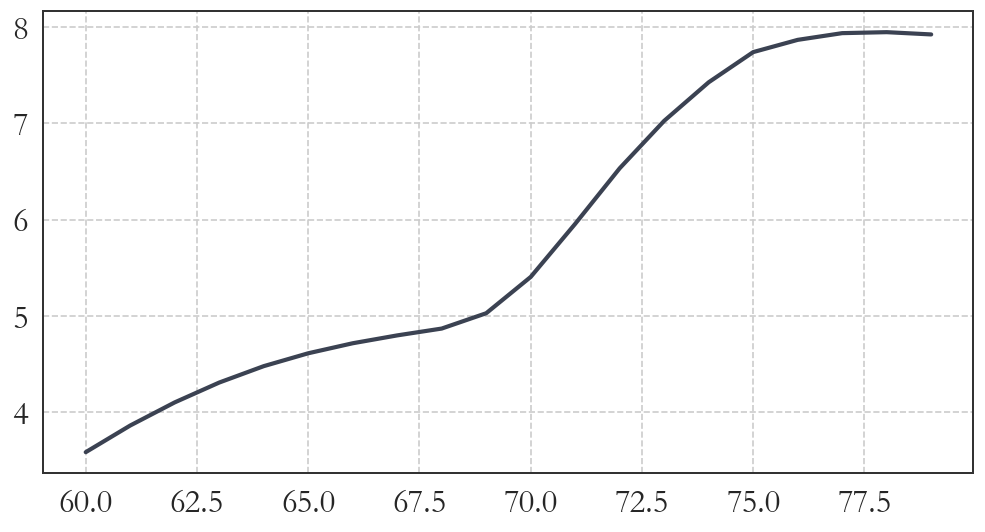

In [ ]:
plt.plot(df_RPA.RPA, df_RPA.LS)

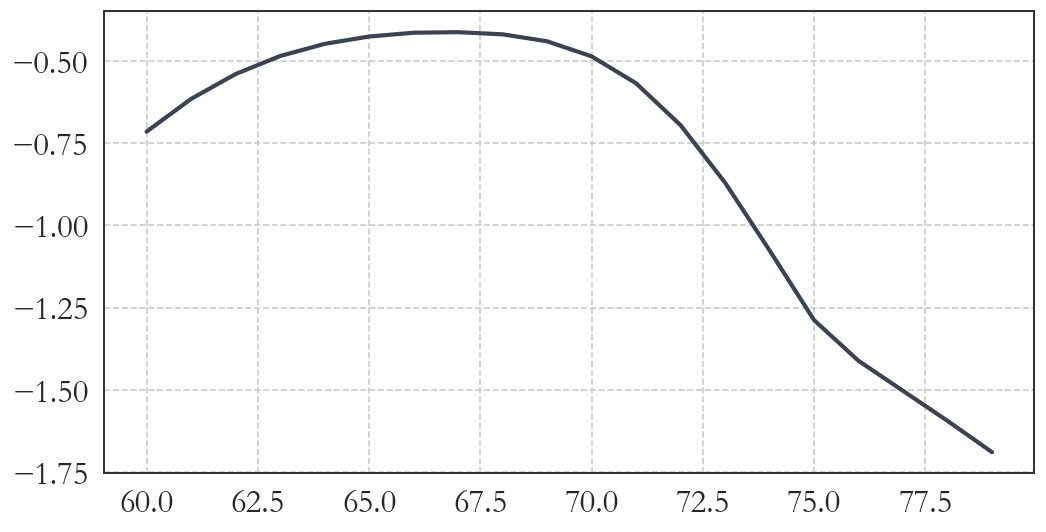

In [ ]:
plt.plot(df_RPA.RPA, df_RPA.CE)

# Increasing SPA keeping RPA and EPA fixxed

In [ ]:
df_SPA = pd.read_csv('Andet\\andet_data\\increasing_SPA_fix_RPA_EPA_RPA_at_30.txt', sep='\s+', header=None)

# Assign column names (optional)
df_SPA.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_SPA = df_SPA.astype(type_dict)
df_SPA[['LS', 'CE']] = df_SPA[['LS', 'CE']]*100
df_SPA['LS_relativ'] =df_SPA['LS'] /total_margin_og
df_SPA[['SPA', 'RPA','EPA']] = df_SPA[['SPA', 'RPA', 'EPA']]+30

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\2786596718.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_SPA = pd.read_csv('Andet\\andet_data\\increasing_SPA_fix_RPA_EPA_RPA_at_30.txt', sep='\s+', header=None)


In [ ]:
df_SPA

,SPA,RPA,EPA,LS,CE
0,61,60,61,0.378949,-1.564097e-02
1,62,60,61,-0.146893,-8.950252e-02
2,63,60,61,-0.076251,-6.516488e-02
3,64,60,61,-0.029065,-3.540521e-02
4,65,60,61,0.000000,-3.553320e-14
5,66,60,61,0.010799,4.081180e-02
6,67,60,61,0.010289,8.797591e-02
7,68,60,61,0.009177,1.399994e-01
8,69,60,61,-0.001821,1.981669e-01
9,70,60,61,0.045304,2.631987e-01


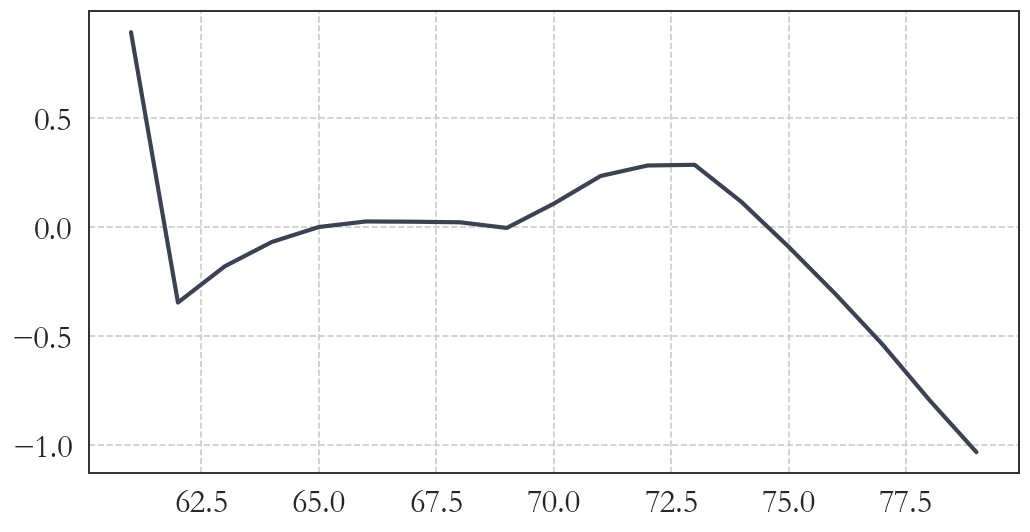

In [ ]:
plt.plot(df_SPA.SPA, df_SPA.LS_relativ)
# plt.plot(df_SPA.SPA, df_SPA.CE)

# Med h_min, det gamle

In [ ]:
df = pd.read_csv('Andet\\andet_data\\total_effect_grid_v2.txt', sep='\s+', header=None)

# Assign column names (optional)
df.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df = df.astype(type_dict)
df[['LS', 'CE']] = df[['LS', 'CE']]*100
df[['SPA', 'RPA']] = df[['SPA', 'RPA']]+30

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\1320313318.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Andet\\andet_data\\total_effect_grid_v2.txt', sep='\s+', header=None)


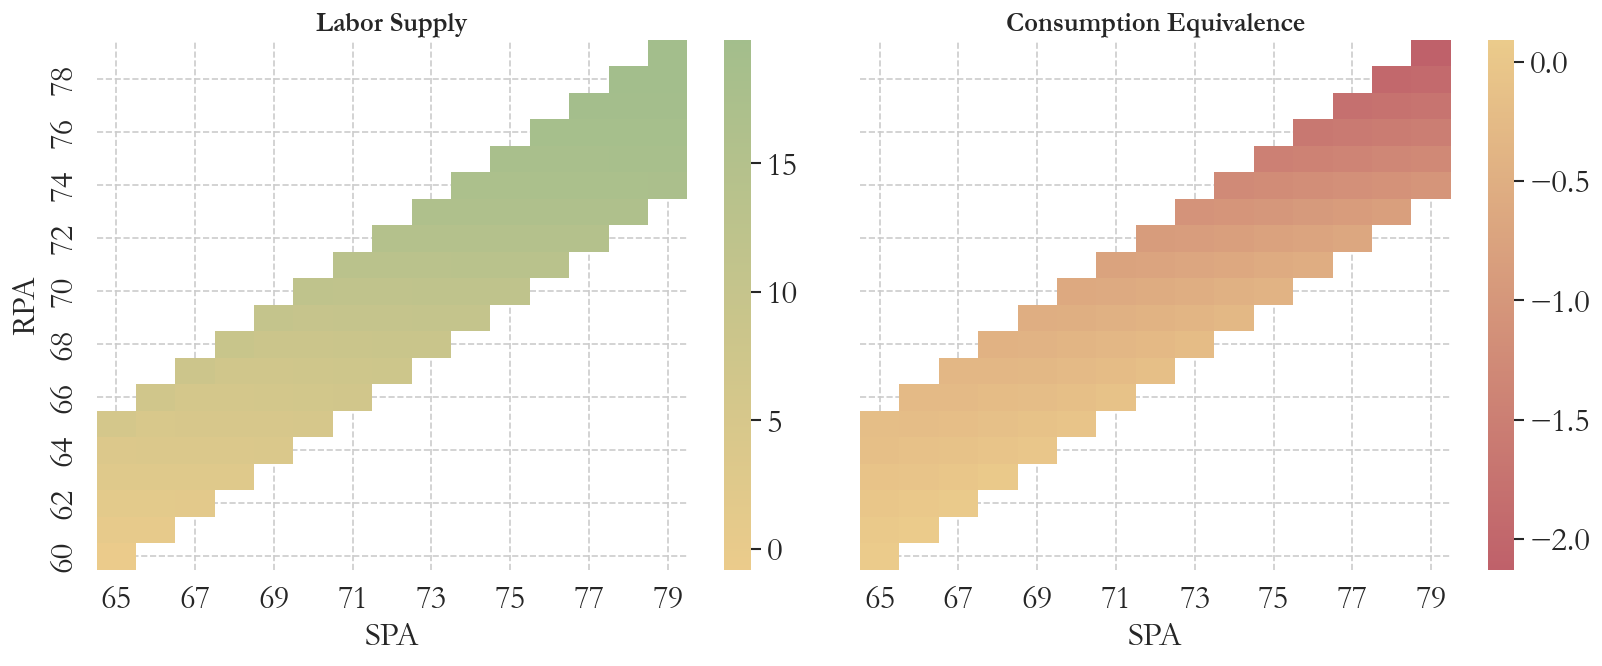

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Brighter green-white-red transition
yellow_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#EBCB8B", "#A3BE8C"]
)
green_yellow = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#BF616A","#EBCB8B"]
)

# Fixed EPA value
fixed_epa = 0
subset = df[df['EPA'] == fixed_epa]

# Pivot data
pivot_ls = subset.pivot(index='RPA', columns='SPA', values='LS')
pivot_ce = subset.pivot(index='RPA', columns='SPA', values='CE')

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.heatmap(pivot_ls, cmap=yellow_red, annot=False, ax=axes[0], cbar=True)
axes[0].invert_yaxis()
axes[0].set_title(f"Labor Supply")
axes[0].set_xlabel("SPA")
axes[0].set_ylabel("RPA")

sns.heatmap(pivot_ce, cmap=green_yellow, annot=False, ax=axes[1], cbar=True)
axes[1].invert_yaxis()
axes[1].set_title(f"Consumption Equivalence")
axes[1].set_xlabel("SPA")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()
save_figure(fig, "CF_policy_space_heatmap.png")


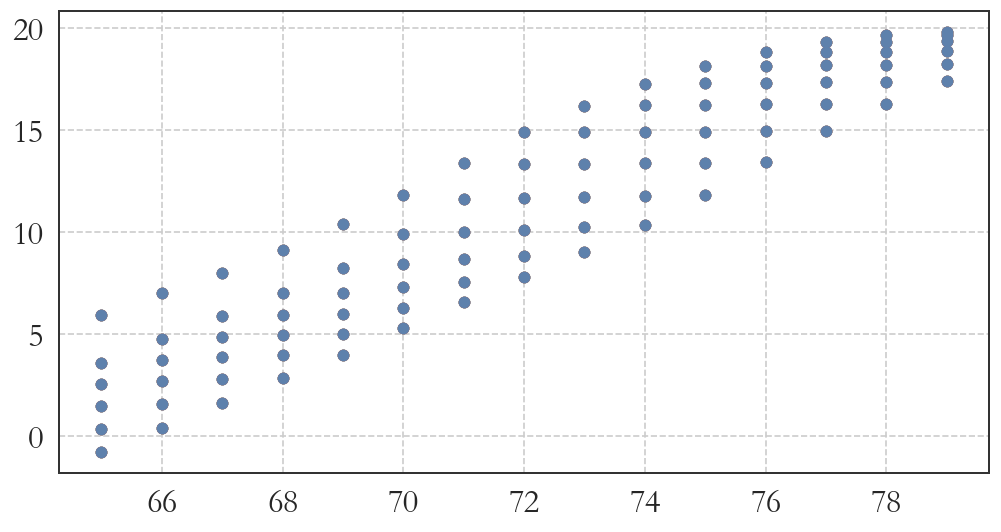

In [ ]:
for i in df.EPA.unique():
    data = df[df['EPA']==0]
    plt.scatter(data['SPA'], data['LS'])
# plt.scatter(data['SPA'], data['CE'])

In [ ]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)
%time model.simulate()

CPU times: total: 13min 53s
Wall time: 7min 45s
CPU times: total: 50 s
Wall time: 1min 9s


In [34]:
df

,SPA,RPA,EPA,LS,CE
0,65,60,0,-0.799618,9.190815e-02
1,65,60,1,0.000000,-3.553320e-14
2,65,60,2,0.783273,-9.692737e-02
3,65,60,3,1.569047,-1.969692e-01
4,65,60,4,2.365192,-2.954934e-01
...,...,...,...,...,...
310,79,77,1,19.425463,-1.752834e+00
311,79,77,2,19.504317,-1.770728e+00
312,79,78,0,19.675747,-1.930642e+00
313,79,78,1,19.713679,-1.948369e+00


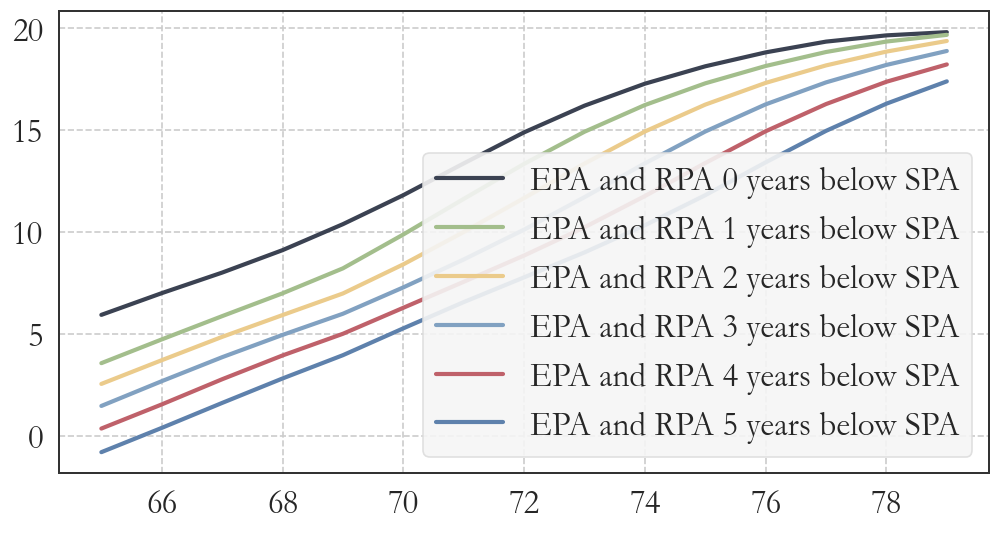

In [33]:
df = pd.read_csv('Andet\\andet_data\\total_effect_grid_v2.txt', sep='\s+', header=None)
# Assign column names (optional)
df.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df = df.astype(type_dict)
df[['LS', 'CE']] = df[['LS', 'CE']]*100
df[['SPA', 'RPA']] = df[['SPA', 'RPA']]+30
data = df[df['EPA']==0]

for i in range(6):
    data_rpa = data[data['RPA']==data['SPA']-i]
    plt.plot(data_rpa.SPA, data_rpa.LS, label=f'EPA and RPA {i} years below SPA')
plt.legend()

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\1999631405.py:15: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Andet\\andet_data\\total_effect_grid_v2.txt', sep='\s+', header=None)


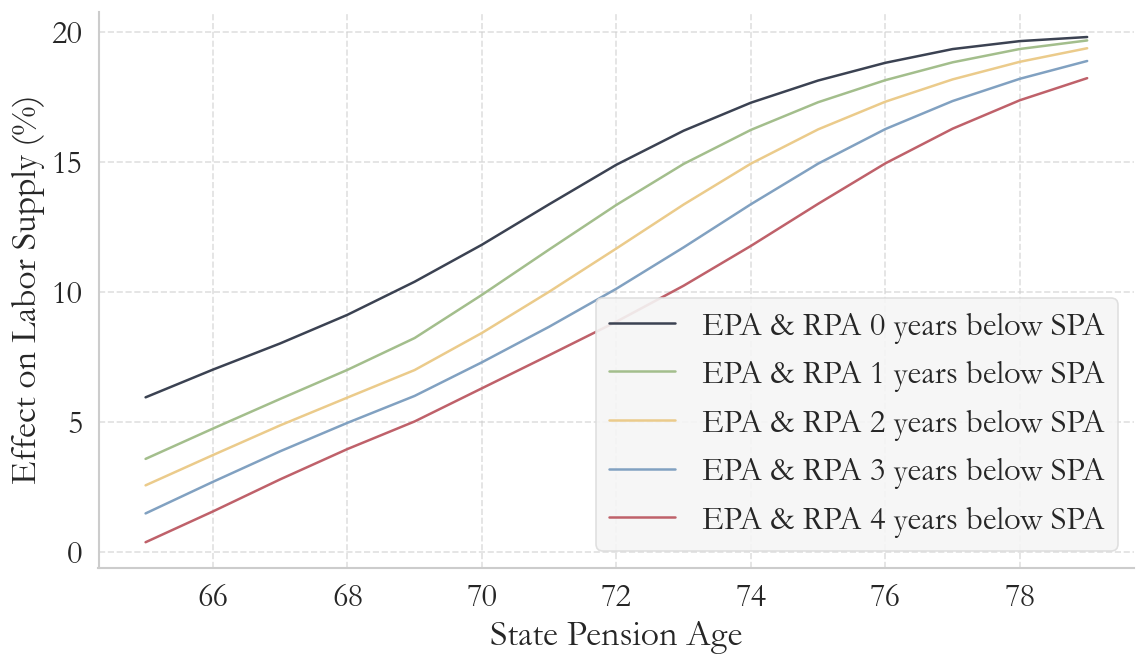

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply consistent style
sns.set_theme(context="notebook", style="whitegrid", font="garamond", palette="deep", font_scale=1.8)
custom_palette = [
    "#3B4252", "#A3BE8C", "#EBCB8B", "#81A1C1", "#BF616A",
    "#5E81AC", "#88C0D0", "#D08770", "#B48EAD", "#434C5E"
]
COLOR_CYCLE = custom_palette

# --- Data Preparation ---
df = pd.read_csv('Andet\\andet_data\\total_effect_grid_v2.txt', sep='\s+', header=None)
df.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
df = df.astype({'SPA': int, 'RPA': int, 'EPA': int})
df[['LS', 'CE']] = df[['LS', 'CE']] * 100
df[['SPA', 'RPA']] = df[['SPA', 'RPA']] + 30
data = df[df['EPA'] == 0]

# --- Plotting ---
plt.figure(figsize=(10, 6))
for i in range(5):
    data_rpa = data[data['RPA'] == data['SPA'] - i]
    plt.plot(data_rpa['SPA'], data_rpa['LS'], label=f'EPA & RPA {i} years below SPA', color=COLOR_CYCLE[i % len(COLOR_CYCLE)])

plt.xlabel("State Pension Age")
plt.ylabel("Effect on Labor Supply (%)")
# plt.title("Labor Supply Effect by SPA for Varying EPA/RPA Gaps")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
save_figure(fig, "SPA_on_LS.png")

plt.show()


In [ ]:
df = pd.read_csv('Andet\\andet_data\\total_effect_grid_v2.txt', sep='\s+', header=None)
df.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
df = df.astype({'SPA': int, 'RPA': int, 'EPA': int})
df[['LS', 'CE']] = df[['LS', 'CE']] * 100
df[['SPA', 'RPA']] = df[['SPA', 'RPA']] + 30


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\2275115498.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Andet\\andet_data\\total_effect_grid_v2.txt', sep='\s+', header=None)


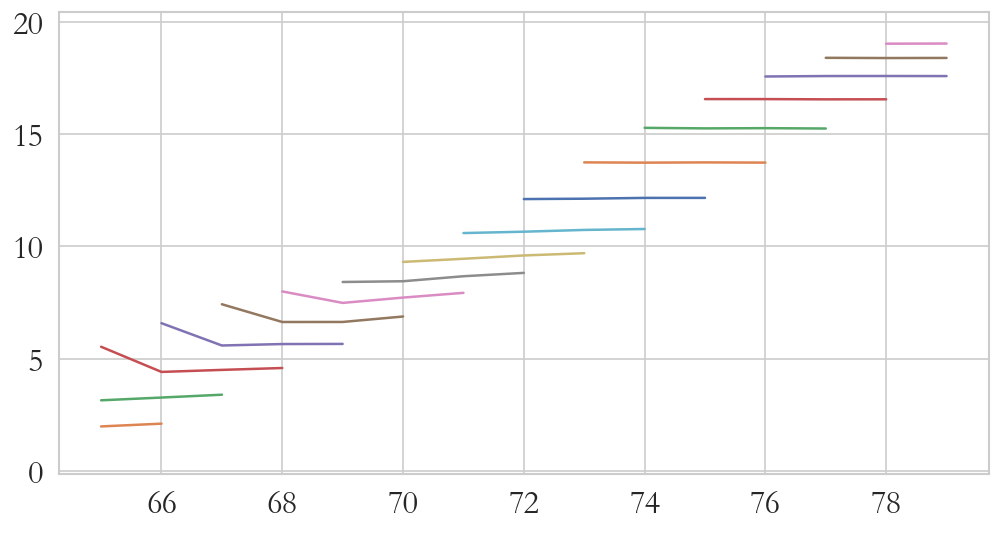

In [ ]:
data = df[df['EPA'] == 2]
for i in data.RPA.unique():
    data_rpa = data[data['RPA'] == i]
    plt.plot(data_rpa.SPA, data_rpa.LS, label=f'RPA {i} years below SPA')

In [42]:
rpa_vals

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]

In [38]:
data_epa_2

,SPA,RPA,EPA,LS,CE
2,65,60,2,0.783273,-0.096927
8,65,61,2,1.975014,-0.143027
13,65,62,2,3.139188,-0.195266
17,65,63,2,5.526366,-0.215298
23,66,61,2,2.098692,-0.110718
29,66,62,2,3.262329,-0.168712
34,66,63,2,4.404575,-0.231092
38,66,64,2,6.577379,-0.274477
44,67,62,2,3.388993,-0.134453
50,67,63,2,4.495073,-0.203693


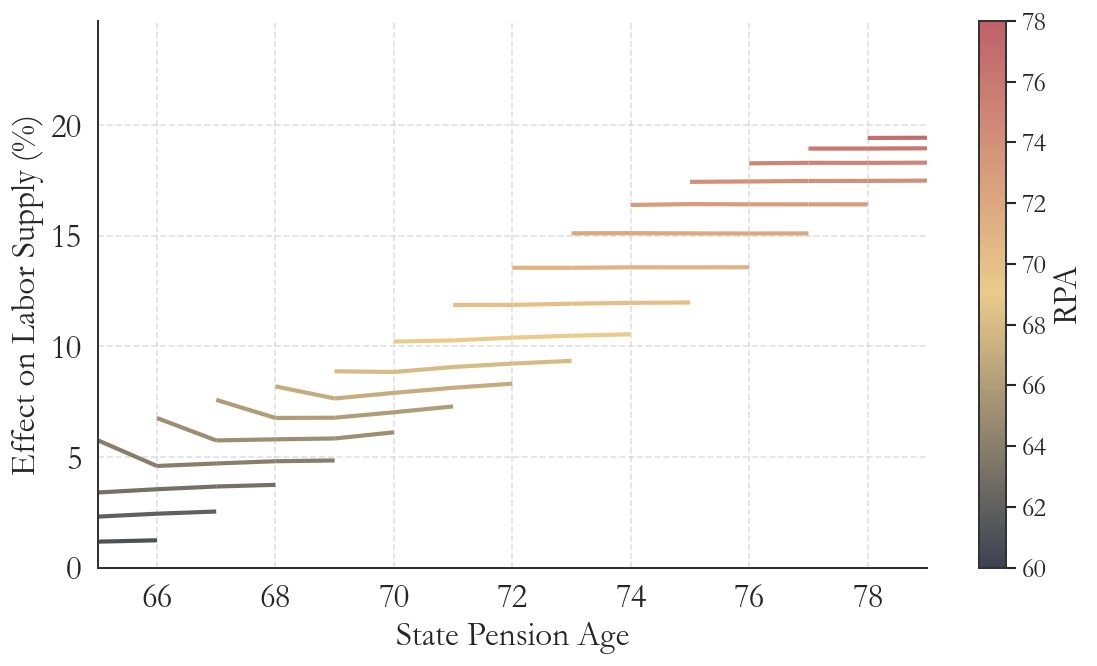

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from graph_format import save_figure

# === Filter data for EPA = 2 ===
data_epa_2 = df[df['EPA'] == 1]

# === Prepare Data ===
rpa_vals = sorted(data_epa_2['RPA'].unique())
norm = mcolors.Normalize(vmin=min(rpa_vals), vmax=max(rpa_vals))

# === Custom colormap ===
black_red = mcolors.LinearSegmentedColormap.from_list(
    "GreenRedBright", ["#3B4252", "#EBCB8B", "#BF616A"]
)

fig, ax = plt.subplots(figsize=(10, 6))

# === Plot each RPA group with color-mapped lines ===
for rpa_val in rpa_vals:
    subset = data_epa_2[data_epa_2['RPA'] == rpa_val]
    if len(subset) < 2:
        continue
    points = np.array([subset['SPA'], subset['LS']]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=black_red, norm=norm)
    lc.set_array(np.full(len(segments), rpa_val))
    lc.set_linewidth(2.5)
    ax.add_collection(lc)

# === Axes formatting ===
ax.set_xlim(data_epa_2['SPA'].min(), data_epa_2['SPA'].max())
ax.set_ylim(0, data_epa_2['LS'].max() + 5)
ax.set_xlabel("State Pension Age", fontsize=20, fontweight="medium")
ax.set_ylabel("Effect on Labor Supply (%)", fontsize=20, fontweight="medium")
ax.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=20)

# === Add colorbar ===
sm = plt.cm.ScalarMappable(norm=norm, cmap=black_red)
sm.set_array([])  # dummy array for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("RPA", fontsize=20)
cbar.ax.tick_params(labelsize=16)

# === Finalize ===
plt.tight_layout()
save_figure(fig, "LS_fix_EPA_and_RPA.png")
plt.show()


In [22]:
data_epa_2

NameError: name 'data_epa_2' is not defined

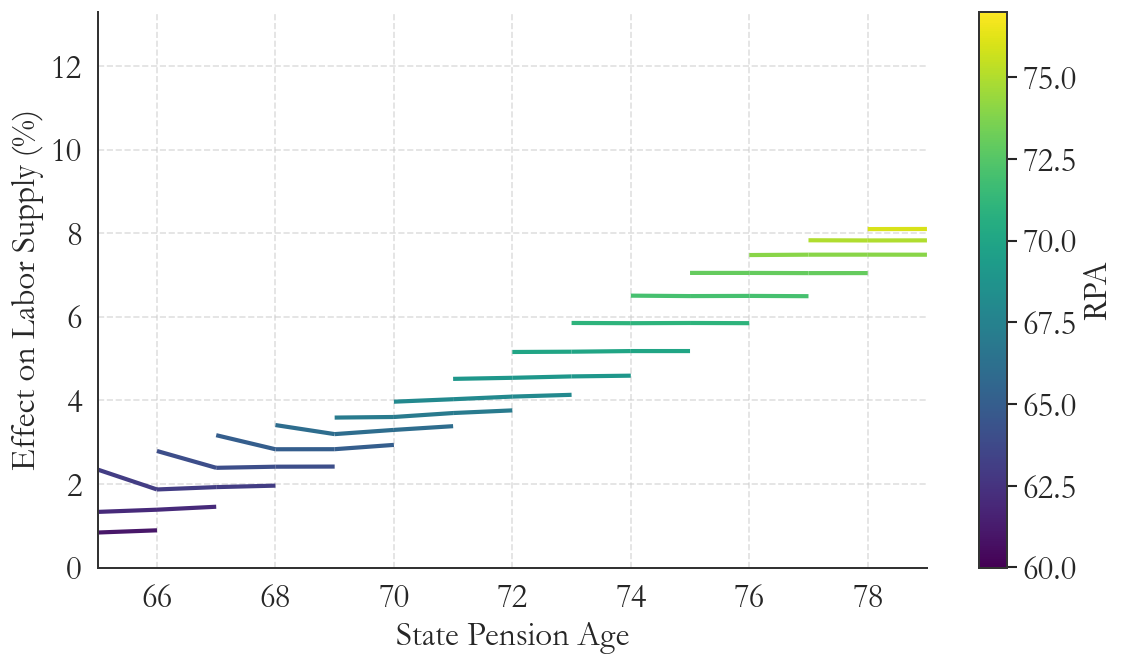

In [23]:
# Filter data for EPA = 2
data_epa_2 = df[df['EPA'] == 2]
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

# Prepare data
rpa_vals = sorted(data_epa_2['RPA'].unique())
norm = Normalize(vmin=min(rpa_vals), vmax=max(rpa_vals))
cmap = viridis

fig, ax = plt.subplots(figsize=(10, 6))

for rpa_val in rpa_vals:
    subset = data_epa_2[data_epa_2['RPA'] == rpa_val]
    if len(subset) < 2:
        continue  # LineCollection needs at least 2 points
    points = np.array([subset['SPA'], subset['LS']]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(np.full(len(segments), rpa_val))
    lc.set_linewidth(2.5)
    ax.add_collection(lc)

ax.set_xlim(data_epa_2['SPA'].min(), data_epa_2['SPA'].max())
ax.set_ylim(0, data_epa_2['LS'].max() + 5)
ax.set_xlabel("State Pension Age")
ax.set_ylabel("Effect on Labor Supply (%)")
# ax.set_title("Labor Supply Effect by SPA (EPA = 2)", fontsize=15)
ax.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # dummy array
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("RPA")

plt.tight_layout()
save_figure(fig, "LS_fix_EPA_and_RPA.png")
plt.show()



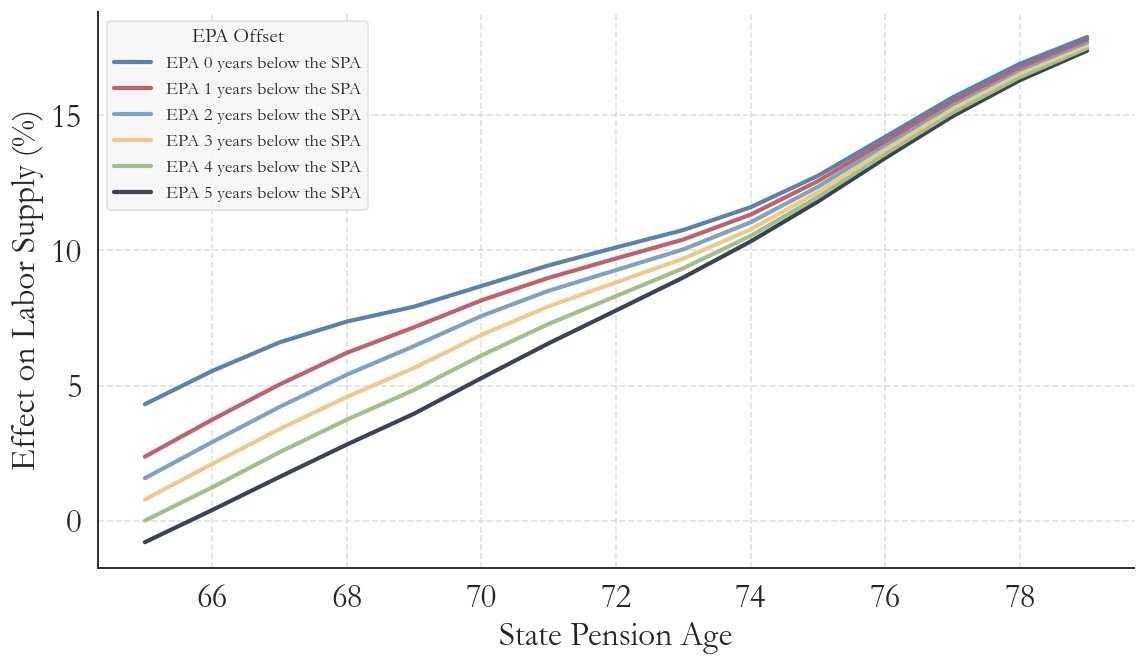

In [36]:
# Filter for fixed RPA 5 years below SPA
data_moving_EF = df[df['RPA'] == df['SPA'] - 5]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(6):
    subset = data_moving_EF[data_moving_EF['EPA'] == i]
    ax.plot(subset['SPA'], subset['LS'],
            label=f'EPA {5-i} years below the SPA',
            color=custom_palette[i % len(custom_palette)],
            linewidth=2.5)

# Reverse legend order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="EPA Offset", fontsize=11, title_fontsize=12, loc="upper left")

# Styling
ax.set_xlabel("State Pension Age")
ax.set_ylabel("Effect on Labor Supply (%)")
ax.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
save_figure(fig, "LS_fix_EPA.png")
plt.show()


In [ ]:
data_moving_EF[data_moving_EF['EPA'] == 4]

,SPA,RPA,EPA,LS,CE
4,65,60,4,2.365192,-0.295493
25,66,61,4,3.736687,-0.307197
46,67,62,4,5.038186,-0.330227
67,68,63,4,6.211796,-0.363093
88,69,64,4,7.157744,-0.400642
109,70,65,4,8.151673,-0.437587
130,71,66,4,8.987769,-0.472168
151,72,67,4,9.702323,-0.504889
172,73,68,4,10.404689,-0.537747
193,74,69,4,11.325285,-0.576445


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\4190364730.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_h_min_05 = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\4190364730.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_h_min_05['LS'] =data_h_min_05['LS'] /total_margin_og


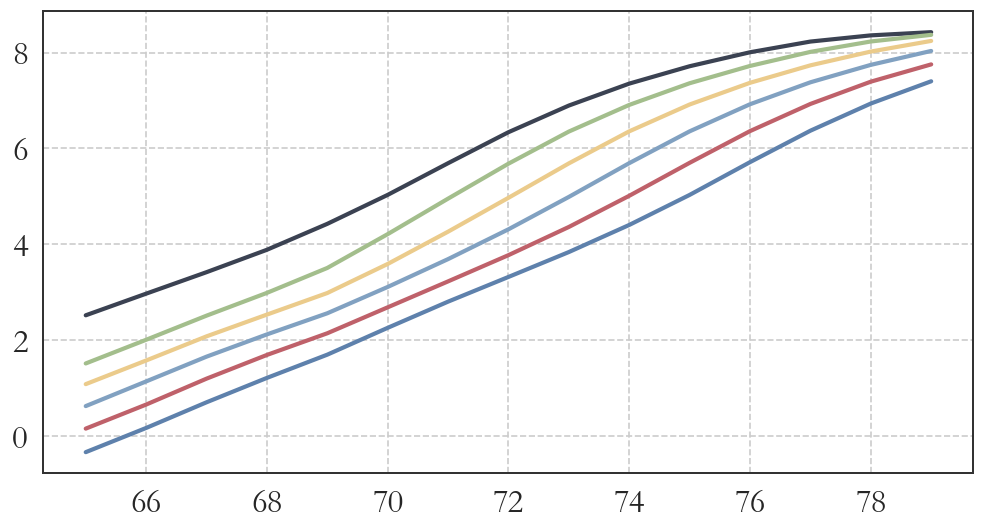

In [ ]:
df_h_min_05 = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df_h_min_05.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_h_min_05 = df_h_min_05.astype(type_dict)
df_h_min_05[['LS', 'CE']] = df_h_min_05[['LS', 'CE']]*100
df_h_min_05[['SPA', 'RPA']] = df_h_min_05[['SPA', 'RPA']]+30
data_h_min_05 = df_h_min_05[df_h_min_05['EPA']==0]

# df = pd.read_csv('Andet\\andet_data\\total_effect_grid_v2.txt', sep='\s+', header=None)
# # Assign column names (optional)
# df.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# # df['EPA'] = df['EPA']+df['RPA']
# type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
# df = df.astype(type_dict)
# df[['LS', 'CE']] = df[['LS', 'CE']]*100
# df[['SPA', 'RPA']] = df[['SPA', 'RPA']]+30
# data = df[df['EPA']==0]

pi_cum = np.cumprod(par.pi)
total_margin_og = np.mean(pi_cum[:model.par.last_retirement] * model.sim.h[:, :model.par.last_retirement])
data_h_min_05['LS'] =data_h_min_05['LS'] /total_margin_og


for i in range(len(df.RPA.unique())):
    data_rpa = data[data['RPA']==data['SPA']-i]
    plt.plot(data_rpa.SPA, data_rpa.LS)
    # data_h_min_05_end = data_h_min_05[data_h_min_05['RPA']==data_h_min_05['SPA']-i]
    # plt.plot(data_h_min_05_end.SPA, data_h_min_05_end.LS, linestyle='--')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\B224264\AppData\Local\Temp\ipykernel_10932\4116255902.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_h_min_05 = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)


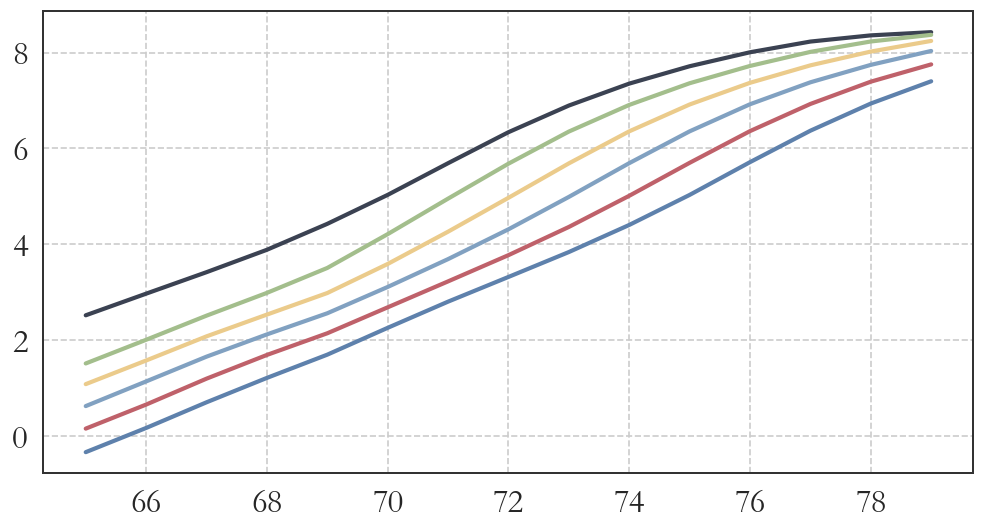

In [ ]:
df_h_min_05 = pd.read_csv('Andet\\andet_data\\total_effect_grid.txt', sep='\s+', header=None)

# Assign column names (optional)
df_h_min_05.columns = ['SPA', 'RPA', 'EPA', 'LS', 'CE']
# df['EPA'] = df['EPA']+df['RPA']
type_dict = {'SPA': int, 'RPA':int, 'EPA':int}
df_h_min_05 = df_h_min_05.astype(type_dict)
df_h_min_05[['LS', 'CE']] = df_h_min_05[['LS', 'CE']]*100
df_h_min_05[['SPA', 'RPA']] = df_h_min_05[['SPA', 'RPA']]+30
data = df_h_min_05[df_h_min_05['EPA']==0]
for i in range(len(df.RPA.unique())):
    data_rpa = data[data['RPA']==data['SPA']-i]
    plt.plot(data_rpa.SPA, data_rpa.LS)

In [ ]:
model.par.early_benefit[0]-model.par.early_benefit[-1]

np.float64(46584.57535400003)

In [ ]:
data = df[df['EPA']==0]
for i in df.RPA.unique():
    data_rpa = data[data['RPA']==i]
    plt.plot(data.SPA, data.LS)